### Import packages

In [1]:
#Calculations
import math
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import colors, cm, ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes

    
#Other
from ring_simulation_tools import *
from waiting_time_tools import *
from entropy_tools import *

/tmp/ipykernel_1888/3316236321.py:10: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


### Set Latex plot font

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family']      = 'STIXGeneral'
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams.update({'errorbar.capsize': 4})
mpl.rcParams['axes.linewidth'] = 2

### Set constants for ring system with uniform bias

In [22]:
Nsteps = 2*10**8 #Number of steps
Nmacro = 8       #Number of observable macrostates
Nmicro = 4       #Number of hidden microstates
Nmilestones = 3  #Number of milestones
pbiasmacro = 0.4 #Probability current between macrostates
pbiasmicro = 0.4 #Probability current between microstates
modelB = True    #Model A (not shown in manuscript) or model B (shown in Figure 2)
milestonelist = np.floor((Nmacro*np.arange(0,Nmilestones,1))/Nmilestones)

### Run ring system with uniform bias

In [23]:
%%time
full_traj, lump_traj, mil_traj = ringgenerator(Nmacro,Nmicro,Nsteps,Nmilestones,pbiasmacro,pbiasmicro,modelB)

CPU times: user 16.3 s, sys: 489 ms, total: 16.8 s
Wall time: 16.8 s


### Determine backward milestoned trajectory (to show kinetic hysteresis)

In [25]:
#Set step limit
step_lim = 300

#Compute milestoned backward trajectory
milestonelist          = np.floor(Nmacro*np.arange(0,Nmilestones,1)/Nmilestones)
mil_traj_back, counter = np.zeros((step_lim)), 0
for i in range(step_lim): 
    if lump_traj[step_lim-1-i] in milestonelist: 
        mil_traj_back[step_lim-1-i] = np.where(lump_traj[step_lim-1-i] == milestonelist)[0]
        if counter == 0: counter = i
    elif i != 0: mil_traj_back[step_lim-1-i] = mil_traj_back[step_lim-i]

#Set initial milestone in the backward trajectory
mil_traj_back[step_lim-counter:step_lim] = mil_traj_back[step_lim-1-counter]

### Plot trajectories (forward and backward in time)
### These results are shown in Figure S2 of the manuscript

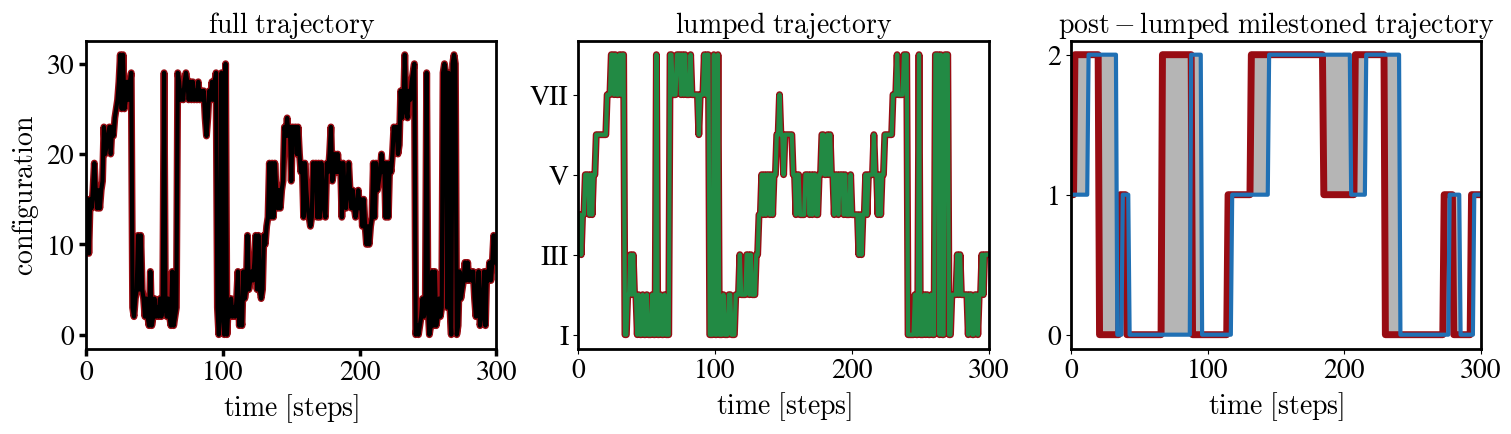

In [27]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4))
ax.ravel()
        
#Plot forward trajectories
ax[0].plot(full_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = 'black');
ax[1].plot(lump_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = cm.Greens(0.75));
ax[2].plot(mil_traj[0:step_lim], linewidth = 3, label = r'forward trajectory',  color = cm.Blues(0.75));

#Plot backward trajectories
ax[0].plot(full_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[1].plot(lump_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[2].plot(mil_traj_back,         label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9),         zorder = -1);

#Explicitly highlight the kinetic hysteresis
ax[2].fill_between(np.arange(0, step_lim, 1), mil_traj[0:step_lim], mil_traj_back, color = cm.Greys(0.4), zorder = -2, label = r'kinetic hysteresis')

#Set labels
ax[0].set_xlabel(r'${\rm time \ [steps]}$', size = 20);
ax[1].set_xlabel(r'${\rm time \ [steps]}$', size = 20);
ax[2].set_xlabel(r'${\rm time \ [steps]}$', size = 20);
ax[0].set_ylabel(r'$\rm configuration$', size = 20);

#Set axis limits
ax[0].set_xlim([0,step_lim]);
ax[1].set_xlim([0,step_lim]);
ax[2].set_xlim([0,step_lim]);

#Set axis ticks
ax[2].set_yticks([0,1,2],['0','1','2']);

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm full \ trajectory$',                     fontsize = 20);
ax[1].set_title(r'$\rm lumped \ trajectory$',                   fontsize = 20);
ax[2].set_title(r'$\rm post-lumped \ milestoned \ trajectory$', fontsize = 20);

#Set ticks
ax[1].set_yticks([0,2,4,6],['I','III','V','VII']);

#Plot legend
#ax[0].legend(frameon = False, fontsize = 17);
#ax[1].legend(frameon = False, fontsize = 17);
#ax[2].legend(frameon = False, fontsize = 17);

#Save figure
#plt.savefig('./Plots/ring_kinetic_hysteresis.pdf', bbox_inches = 'tight', dpi = 100)

### Plot waiting-time distributions for milestoned trajectory  (this only works when Nmilestones = 3)

In [28]:
#Collect waiting-time statistics for each of the three milestones
psi0min, psi0plus, psi1plus, psi1min, psi2min, psi2plus = waiting_time_module(mil_traj)

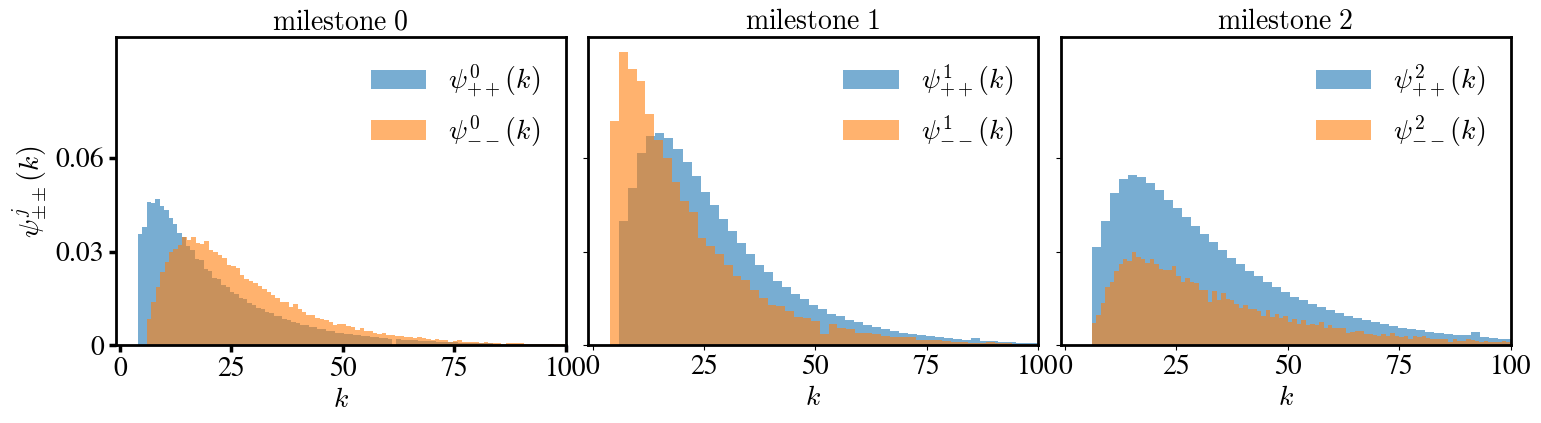

In [52]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey = True)
ax.ravel()

#Compute histograms
counts1, bins1 = np.histogram(psi0min,  bins = 200)
counts2, bins2 = np.histogram(psi0plus, bins = 235)
counts3, bins3 = np.histogram(psi1min,  bins = 148)
counts4, bins4 = np.histogram(psi1plus, bins = 118)
counts5, bins5 = np.histogram(psi2min,  bins = 245)
counts6, bins6 = np.histogram(psi2plus, bins = 210)

#Plot histograms
ax[0].stairs(counts2/np.sum(counts2), bins2, fill = True, alpha = 0.6, label = r'$\psi^{0}_{++}(k)$')
ax[0].stairs(counts1/np.sum(counts1), bins1, fill = True, alpha = 0.6, label = r'$\psi^{0}_{--}(k)$')

ax[1].stairs(counts4/np.sum(counts4), bins4, fill = True, alpha = 0.6, label = r'$\psi^{1}_{++}(k)$')
ax[1].stairs(counts3/np.sum(counts3), bins3, fill = True, alpha = 0.6, label = r'$\psi^{1}_{--}(k)$')

ax[2].stairs(counts6/np.sum(counts6), bins6, fill = True, alpha = 0.6, label = r'$\psi^{2}_{++}(k)$')
ax[2].stairs(counts5/np.sum(counts5), bins5, fill = True, alpha = 0.6, label = r'$\psi^{2}_{--}(k)$')

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm milestone \ 0$', fontsize = 20);
ax[1].set_title(r'$\rm milestone \ 1$', fontsize = 20);
ax[2].set_title(r'$\rm milestone \ 2$', fontsize = 20);

#Set labels
ax[0].set_xlabel(r'$k$', size = 20);
ax[1].set_xlabel(r'$k$', size = 20);
ax[2].set_xlabel(r'$k$', size = 20);
ax[0].set_ylabel(r'$\psi^{j}_{\pm\pm}(k)$', size = 20);

#Set axis-limits
axlim = 100
ax[0].set_xlim([-1,axlim]);
ax[1].set_xlim([-1,axlim]);
ax[2].set_xlim([-1,axlim]);

#Set axis ticks
ax[0].set_yticks([0,0.03,0.06],['0','0.03','0.06'])

#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Plot legend
ax[0].legend(frameon = False, fontsize = 20);
ax[1].legend(frameon = False, fontsize = 20);
ax[2].legend(frameon = False, fontsize = 20);

#Save figure
#plt.savefig('./Plots/waiting_time_distribution_ringB.pdf', bbox_inches = 'tight', dpi = 100)

### Save waiting-time distributions

In [ ]:
np.save('psi0minringB.npy',  psi0min,  allow_pickle=True, fix_imports=True)
np.save('psi0plusringB.npy', psi0plus, allow_pickle=True, fix_imports=True)
np.save('psi1minringB.npy',  psi1min,  allow_pickle=True, fix_imports=True)
np.save('psi1plusringB.npy', psi1plus, allow_pickle=True, fix_imports=True)
np.save('psi2minringB.npy',  psi2min,  allow_pickle=True, fix_imports=True)
np.save('psi2plusringB.npy', psi2plus, allow_pickle=True, fix_imports=True)

### Model A: Calculate entropy production for increasing number of hidden states
### This model is not shown in the manuscript

In [22]:
#Set constants
Nsteps = 2*10**8
Nmilestones  = 3
Nmacrostates = 30
Nmicrostates = 10

#Initialize arrays
QA1_lumped        = np.zeros((Nmicrostates-3))
QA2_lumped        = np.zeros((Nmicrostates-3))
QA1_mil           = np.zeros((Nmicrostates-3))
QA2_mil           = np.zeros((Nmicrostates-3))

In [23]:
%%time
for i in range(4,Nmicrostates+1):

    #Construct trajectories
    full_traj, lump_traj, mil_traj = ringgenerator(Nmacrostates,i,Nsteps,Nmilestones,0.45,0.45,False)
        
    #Calculate entropy production
    exact_entropy  = markov_entropy_calculator(full_traj,1)
    lump2_entropy  = semi_markov_entropy_module(lump_traj,2)
    mil2_entropy   = semi_markov_entropy_module(mil_traj,2)
    lump1_entropy  = markov_entropy_calculator(lump_traj,1)
    mil1_entropy   = markov_entropy_calculator(mil_traj,1)

    #Calculate quality factors
    QA1_lumped[i-4]    = lump1_entropy/exact_entropy
    QA1_mil[i-4]       = mil1_entropy/exact_entropy
    QA2_lumped[i-4]    = lump2_entropy/exact_entropy
    QA2_mil[i-4]       = mil2_entropy/exact_entropy
        
    print(i,QA1_lumped[i-4],QA1_mil[i-4],QA2_lumped[i-4],QA2_mil[i-4])

4 0.13463331545493784 0.3745075546681324 0.40066832779944955 0.4189253688281435
5 0.09610635348728346 0.29983296220794475 0.32252530932683476 0.32888358775447035
6 0.0645834185056177 0.2348645023674703 0.2527148939498863 0.25574116772024585
7 0.048922372857158794 0.1933725566580748 0.21021770898308786 0.21997344215877165
8 0.03561418015431687 0.15809550302387096 0.17068710524674074 0.1757528536964449
9 0.02831395540630204 0.1340782194569189 0.14621232059369169 0.15278179081093834
10 0.022006523159646848 0.11333555608574018 0.12372116467126161 0.12342025508693619
CPU times: user 7min 56s, sys: 18.1 s, total: 8min 14s
Wall time: 8min 13s


### Show raw data

QA1_lumped = np.array([0.13463332, 0.09610635, 0.06458342, 0.04892237, 0.03561418,
       0.02831396, 0.02200652])

QA1_mil = np.array([0.37450755, 0.29983296, 0.2348645 , 0.19337256, 0.1580955 ,
       0.13407822, 0.11333556])

QA2_lumped = np.array([0.40066833, 0.32252531, 0.25271489, 0.21021771, 0.17068711,
       0.14621232, 0.12372116])

QA2_mil = np.array([0.41892537, 0.32888359, 0.25574117, 0.21997344, 0.17575285,
       0.15278179, 0.12342026])

### Plot data

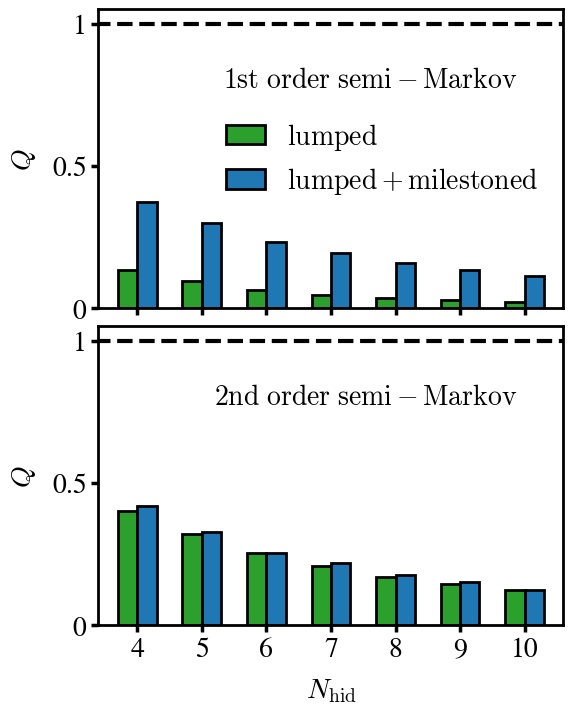

In [29]:
#Figure settings
fig, ax = plt.subplots(2,1, figsize = (6,8), sharey = True, sharex = True)
ax.ravel();

#Set x-axis
x  = np.arange(4, Nmicrostates+1, 1)
x2 = np.arange(3, Nmicrostates+3, 1)

#Plot horizontal line indicating Q=1
ax[0].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[1].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)

#Plot bar-charts for quality factor
offset = 0.15
ax[0].bar(x-offset, QA1_lumped, width = 2*offset,  color = 'C2', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')
ax[0].bar(x+offset, QA1_mil,    width = 2*offset,  color = 'C0', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped + milestoned$')
ax[1].bar(x-offset, QA2_lumped, width = 2*offset,  color = 'C2', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')
ax[1].bar(x+offset, QA2_mil,    width = 2*offset,  color = 'C0', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')

#Add titles
ax[0].text(0.9, 0.72, r'$\rm 1st \ order \ semi-Markov$',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[0].transAxes, fontsize=20);
ax[1].text(0.9, 0.72, r'$\rm 2nd \ order \ semi-Markov$',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[1].transAxes, fontsize=20);

#Set x-label
ax[1].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);

#Set y-label
ax[0].set_ylabel(r'$Q$', size = 20, labelpad = 10);
ax[1].set_ylabel(r'$Q$', size = 20, labelpad = 10);
    
#Adjust width subplots
plt.subplots_adjust(hspace=0.06, wspace=0.06)

#Set axis tick form
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].tick_params('both', length=5, width=2.5, which='major');
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[0].set_yticks([0,0.5,1],['0','0.5','1'],color='black');
ax[1].set_yticks([0,0.5,1],['0','0.5','1'],color='black');
ax[1].set_xticks([4,5,6,7,8,9,10],['4','5','6','7','8','9','10'],color='black');

#Set axis limits
ax[1].set_xlim([3.4,10.6])

#Legend
ax[0].legend(loc = 'best', handlelength = 1.4, frameon = False, fontsize = 20);

#Save figure
plt.savefig('./Plots/quality_factor_ring_model_A.pdf', bbox_inches = 'tight', dpi = 200)

### Model B: Calculate entropy production  for increasing number of hidden states
### This model is shown in Figure 2 of the manuscript

In [6]:
#Set constants
Nsteps = 2*10**8
Nmilestones  = 4
Nmacrostates = 32
Nmicrostates = 10

#Initialize arrays
QB1_lumped        = np.zeros((Nmicrostates-3))
QB2_lumped        = np.zeros((Nmicrostates-3))
QB1_mil           = np.zeros((Nmicrostates-3))
QB2_mil           = np.zeros((Nmicrostates-3))

In [7]:
%%time
for i in range(4,Nmicrostates+1):

    #Construct trajectories
    full_traj, lump_traj, mil_traj = ringgenerator(Nmacrostates,i,Nsteps,Nmilestones,0.45,0.45,True)
        
    #Calculate entropy production
    exact_entropy  = markov_entropy_calculator(full_traj,1)
    lump2_entropy  = semi_markov_entropy_module(lump_traj,2)
    mil2_entropy   = semi_markov_entropy_module(mil_traj,2)
    lump1_entropy  = markov_entropy_calculator(lump_traj,1)
    mil1_entropy   = markov_entropy_calculator(mil_traj,1)

    #Calculate quality factors
    QB1_lumped[i-4]    = lump1_entropy/exact_entropy
    QB1_mil[i-4]       = mil1_entropy/exact_entropy
    QB2_lumped[i-4]    = lump2_entropy/exact_entropy
    QB2_mil[i-4]       = mil2_entropy/exact_entropy
        
    print(i,QB1_lumped[i-4],QB1_mil[i-4],QB2_lumped[i-4],QB2_mil[i-4])

4 0.19149652852442478 0.5249340866036362 0.5716910930368267 0.5693667166219241
5 0.17100841097581682 0.469362137878796 0.5104897615373531 0.5199388788898209
6 0.15752353150406648 0.43089887979859537 0.4698994627495701 0.46866273477804526
7 0.09755836775836423 0.3395968299462333 0.36508930252010013 0.37099977120602956
8 0.0584988404225811 0.25882929825457046 0.28635986521487944 0.28735273172566095
9 0.05301196557836306 0.23424779305863996 0.2591701692337262 0.26067177908296657
10 0.049989400137183754 0.22102806934308122 0.24445605628530526 0.2501572113821489
CPU times: user 8min 28s, sys: 27.6 s, total: 8min 56s
Wall time: 8min 55s


### Show raw data

QB1_mil = np.array([0.52493409, 0.46936214, 0.43089888, 0.33959683, 0.2588293 ,
       0.23424779, 0.22102807])

QB1_lumped = np.array([0.19149653, 0.17100841, 0.15752353, 0.09755837, 0.05849884,
       0.05301197, 0.0499894 ])

QB2_mil = np.array([0.56936672, 0.51993888, 0.46866273, 0.37099977, 0.28735273,
       0.26067178, 0.25015721])

QB2_lumped = np.array([0.57169109, 0.51048976, 0.46989946, 0.3650893 , 0.28635987,
       0.25917017, 0.24445606])

### Plot data

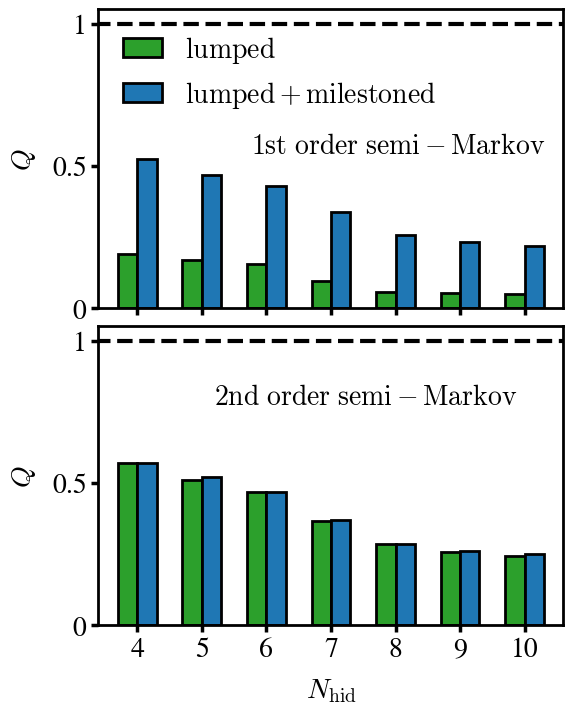

In [8]:
#Figure settings
fig, ax = plt.subplots(2,1, figsize = (6,8), sharey = True, sharex = True)
ax.ravel();

#Set x-axis
x  = np.arange(4, Nmicrostates+1, 1)
x2 = np.arange(3, Nmicrostates+3, 1)

#Plot horizontal line indicating Q=1
ax[0].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[1].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)

#Plot bar-charts for quality factor
offset = 0.15
ax[0].bar(x-offset, QB1_lumped, width = 2*offset,  color = 'C2', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')
ax[0].bar(x+offset, QB1_mil,    width = 2*offset,  color = 'C0', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped + milestoned$')
ax[1].bar(x-offset, QB2_lumped, width = 2*offset,  color = 'C2', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')
ax[1].bar(x+offset, QB2_mil,    width = 2*offset,  color = 'C0', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')

#Add titles
ax[0].text(0.96, 0.5, r'$\rm 1st \ order \ semi-Markov$',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[0].transAxes, fontsize=20);
ax[1].text(0.9, 0.72, r'$\rm 2nd \ order \ semi-Markov$',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[1].transAxes, fontsize=20);

#Set x-label
ax[1].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);

#Set y-label
ax[0].set_ylabel(r'$Q$', size = 20, labelpad = 10);
ax[1].set_ylabel(r'$Q$', size = 20, labelpad = 10);
    
#Adjust width subplots
plt.subplots_adjust(hspace=0.06, wspace=0.06)

#Set axis tick form
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].tick_params('both', length=5, width=2.5, which='major');
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[0].set_yticks([0,0.5,1],['0','0.5','1'],color='black');
ax[1].set_yticks([0,0.5,1],['0','0.5','1'],color='black');
ax[1].set_xticks([4,5,6,7,8,9,10],['4','5','6','7','8','9','10'],color='black');

#Set axis limits
ax[1].set_xlim([3.4,10.6])

#Legend
ax[0].legend(loc = 'upper left', handlelength = 1.4, frameon = False, fontsize = 20);

#Save figure
plt.savefig('./Plots/quality_factor_ring_model_B.pdf', bbox_inches = 'tight', dpi = 200)